# INTRODUCTION

 This is our project for a categorical dataset, which in our case is a dataset of Campus placements of an Indian Business School. We will be using Python as our programming language. 

 Our dataset revolves around the placement season, where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and salary details.
 
 Our main aims for this project include:
 
 i) Doing an exploratory analysis of the Recruitment dataset.
 
 ii)Doing a visualization analysis of the Recruitment dataset.
 
 iii)To predict whether the student will be placed or not.

In [1]:
#Importing Libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Input data from csv dataset.
data = pd.read_csv("Placement_dataset.csv")

In [4]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
# ssc_p - SSC Exams Percentage
# ssc_b - SSC Exams Board
# hsc_p - HSC Exams Percentage
# hsc_b - HSC Exams Board
# hsc_s - HSC Stream
# degree_p - Degree studies Percentage
# degree_t - Degree Type
# workex - Previous Work Experience
# etest_p - Employability Test Percentage
# mba_p - MBA Exam Percentage


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
#There are certain rows in the salary column which do not have any value. This is because these students have not been placed.
#So we will replace these null values with the value '0'.

data['salary'].fillna(0, inplace = True)

In [9]:
data.info()
#Now it is seen that there are no missing values in the salary column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [11]:
data.shape

(215, 15)

In [12]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# We will use countplots to have a general idea of the values.

<AxesSubplot:xlabel='status', ylabel='count'>

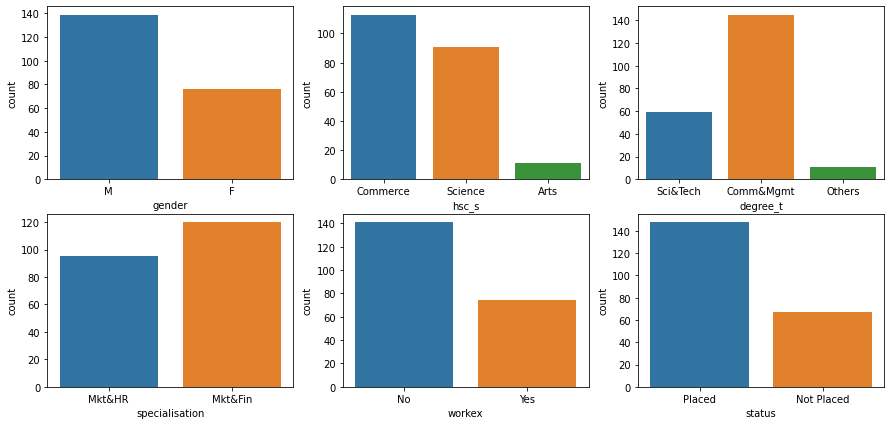

In [13]:
plt.figure(figsize = (15, 7))

#Gender
plt.subplot(231)
sns.countplot(x="gender", data = data)

#HSC Stream
plt.subplot(232)
sns.countplot(x="hsc_s", data = data)

#Degree type
plt.subplot(233)
sns.countplot(x="degree_t", data = data)
                            
#Specialisation
plt.subplot(234)
sns.countplot(x="specialisation", data= data)

#Work experience
plt.subplot(235)
sns.countplot(x="workex", data= data)

#Status of recruitment
plt.subplot(236)
sns.countplot(x="status", data = data)


# The following conclusions can be made from the above charts:

 The number of male students is more than female students.
 
 Commerce was the most chosen stream during higher secondary education, followed closely by Science.
 
 After 12th majority of the students opted for Commerce & Management Degree.
 
 Number of students specializing in Marketing & Financing were a bit more than Market & HR.
 
 Majority of the students did not have any prior work experience.
 
 Finally majority of the students did get placed.

Text(0.5, 1.0, 'Employability percentage')

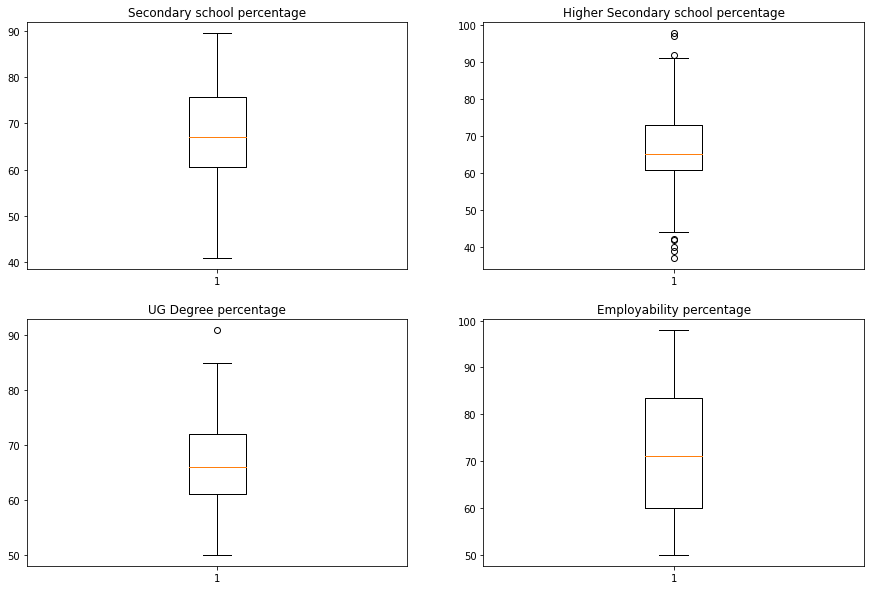

In [14]:
plt.figure(figsize = (15, 10))
ax = plt.subplot(221)
plt.boxplot(data.ssc_p)
ax.set_title('Secondary school percentage')
ax = plt.subplot(222)
plt.boxplot(data.hsc_p)
ax.set_title('Higher Secondary school percentage')
ax = plt.subplot(223)
plt.boxplot(data.degree_p)
ax.set_title('UG Degree percentage')
ax = plt.subplot(224)
plt.boxplot(data.etest_p)
ax.set_title('Employability percentage')

It is clearly visible that we have quite a few number of outliers in the HSC percentage column.
So we will try to remove these outliers.

In [15]:
Q1 = data['hsc_p'].quantile(0.25)
Q3 = data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['hsc_p'] >= Q1 - 1.5 * IQR) & (data['hsc_p'] <= Q3 + 1.5 *IQR)
data_removed = data.loc[filter]

Text(0.5, 1.0, 'Employability percentage')

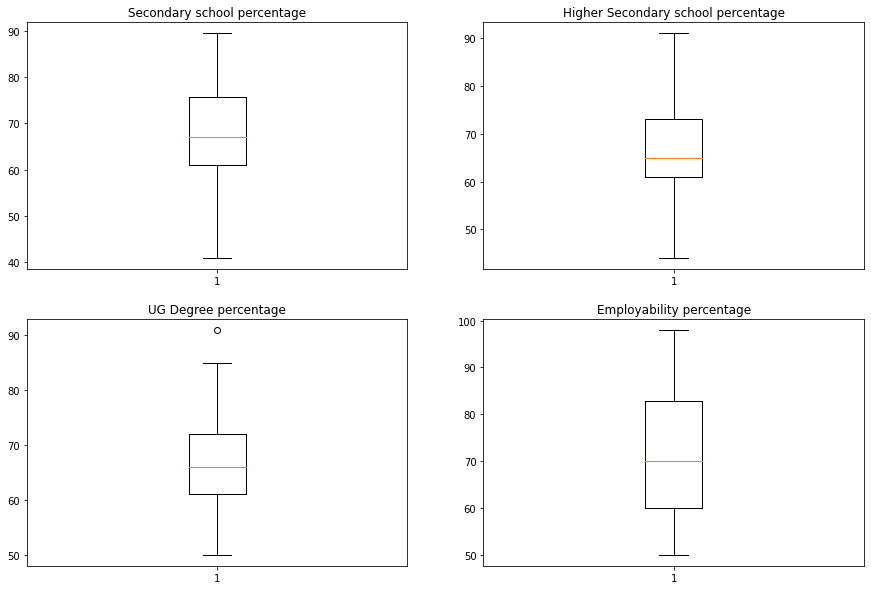

In [16]:
plt.figure(figsize = (15, 10))
ax = plt.subplot(221)
plt.boxplot(data_removed.ssc_p)
ax.set_title('Secondary school percentage')
ax = plt.subplot(222)
plt.boxplot(data_removed.hsc_p)
ax.set_title('Higher Secondary school percentage')
ax = plt.subplot(223)
plt.boxplot(data_removed.degree_p)
ax.set_title('UG Degree percentage')
ax = plt.subplot(224)
plt.boxplot(data_removed.etest_p)
ax.set_title('Employability percentage')

We have managed to get rid of the outliers now.

# We shall now see how the work experience of a student affects their placement.

No     135
Yes     72
Name: workex, dtype: int64

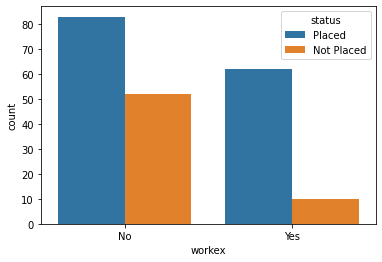

In [17]:
sns.countplot(x = 'workex', hue = 'status' , data = data_removed)
data_removed['workex'].value_counts()

From the above countplot we can observe that there are more students who have been placed without any prior work experience.
We can also observe that there were certain students who had prior work experience but still did not get placed.
Thus we can say that work experience does not necessarily help in getting placed.

# Now we will see if there is any relation between the academic percentage and getting placed.

<AxesSubplot:xlabel='ssc_p', ylabel='status'>

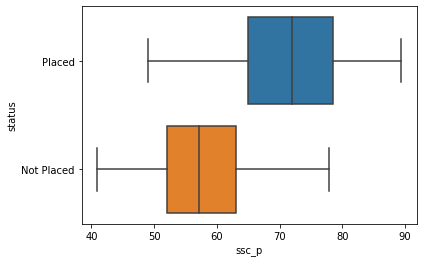

In [18]:
# SSC Percentage:
sns.boxplot(y = 'status' ,x = 'ssc_p' ,data = data_removed)

<AxesSubplot:xlabel='hsc_p', ylabel='status'>

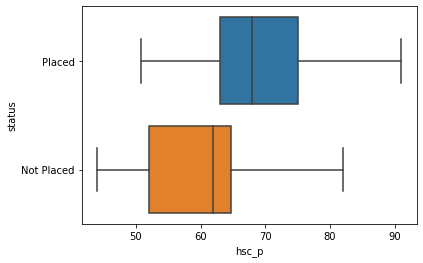

In [19]:
# HSC Percentage:
sns.boxplot(y = 'status' ,x = 'hsc_p',data = data_removed)

<AxesSubplot:xlabel='degree_p', ylabel='status'>

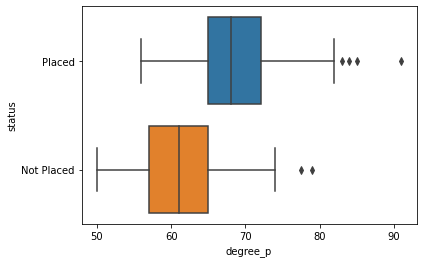

In [20]:
# Degree Percentage:
sns.boxplot(y = 'status' ,x = 'degree_p', data = data_removed)

<AxesSubplot:xlabel='etest_p', ylabel='status'>

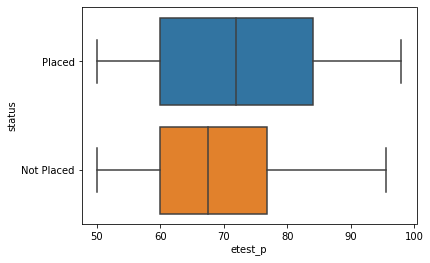

In [21]:
# Employability Test:
sns.boxplot(y = 'status' ,x = 'etest_p', data = data_removed)

<AxesSubplot:xlabel='mba_p', ylabel='status'>

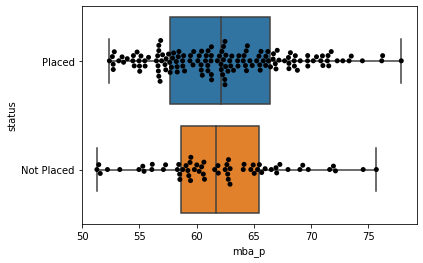

In [22]:
# MBA Percentage:
sns.boxplot(y = 'status',x = 'mba_p', data = data_removed)
sns.swarmplot(y = 'status',x = 'mba_p', data = data_removed, color = 'black')

From the above plots it is clearly visible that the students who have got placed have a much higher score in the SSC, HSC and their final degree exams.

But the final plot suggests that getting a good MBA % does not guarentee a placement as there are many students who havent 
been placed even after getting similar scores to those students who have been placed.

# Now we will see if a certain board for SSC or HSC results in better placements:

Central    113
Others      94
Name: ssc_b, dtype: int64

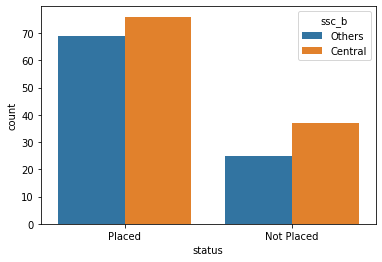

In [23]:
#SSC Board:
sns.countplot(x = 'status', hue = 'ssc_b' , data = data_removed)
#print('Ratio of other boards placed to not placed = ',)
data_removed['ssc_b'].value_counts()

Others     125
Central     82
Name: hsc_b, dtype: int64

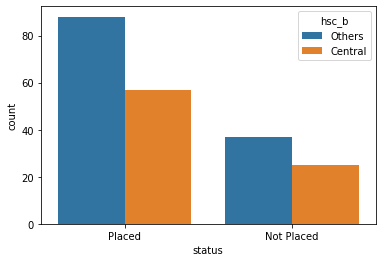

In [24]:
#HSC Board:
sns.countplot(x = 'status', hue = 'hsc_b' , data = data_removed)
data_removed['hsc_b'].value_counts()

From the above plots it can be understood for the SSC exams,majority of the students have chosen Central board and the students from the other boards were placed more than the the students from central board.
From the other boards approximately 73% students got placed, while from the central board approximately 66% students got
placed.

For HSC though, majortiy of the students have chosen other boards but the ratio of students getting placed is almost identical for all boards. 
Here approximately 70% students of both boards got placed.

# Here we will just have a look at visual graphs of the attributes.

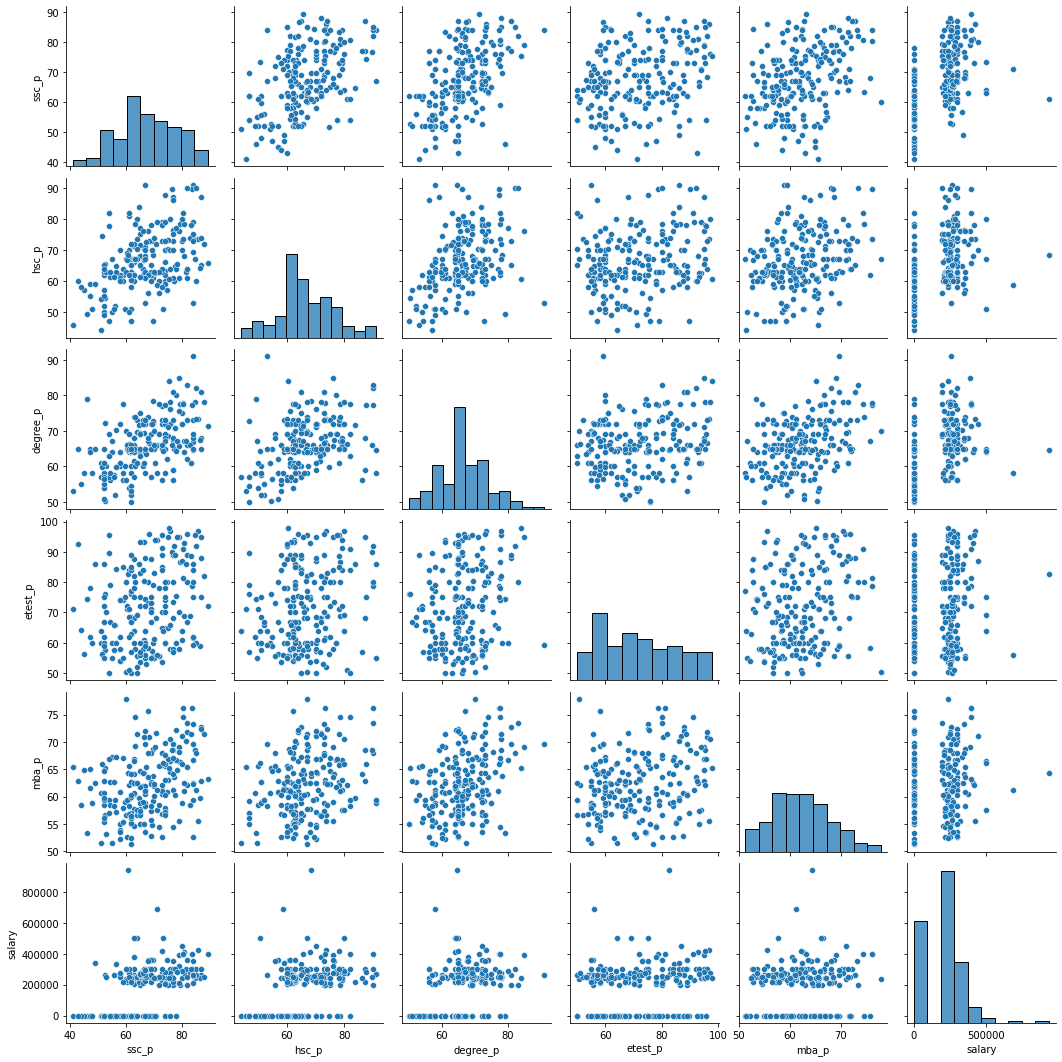

In [25]:

sns.pairplot(data_removed.iloc[:, 1:])

# Finally we shall create a correlation grid to see which attributes matter the most for salary.

<AxesSubplot:>

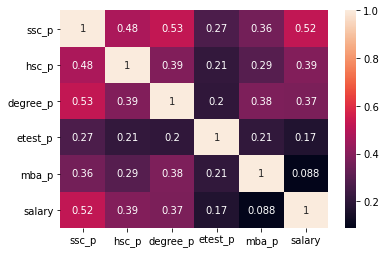

In [26]:
sns.heatmap(data_removed.iloc[:,1:].corr(), annot = True)

Although none of the attribute have a very strong correlation with each other, we can observe that SSC%, HSC % and degree % 
have the highest correlation with salary and MBA % has a very weak correlation with salary.

# Now to perform certain algorithms on our model, we will 1st perform encoding to convert atrributes of object type to suitable float type.

For the attributes which have different types which are not in float or integer, we will use label encoding which will substitute the values with integers starting from 0.

In [27]:
from sklearn.preprocessing import LabelEncoder

for col in ['gender','ssc_b','hsc_b','workex','specialisation','status','hsc_s','degree_t']:
    data_removed[col] = LabelEncoder().fit_transform(data_removed[col])


In [28]:
data_removed.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [29]:
data_final = data_removed

In [30]:
data_final.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [31]:
features = data_final.iloc[:,1:]
features = features.drop("status", axis=1) #this will be in target as this is what we want to predict.
features = features.drop("salary", axis=1) #Salary is not used to predict placement as it is decided after placement.

target = data_final["status"]



In [32]:
features.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [33]:
target.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int32

# Now we shall split our model into test and training parts to finally predict the results using several algorithms.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 10)

print(X_train.shape,"  ",X_test.shape)
print(y_train.shape,"  ",y_test.shape)

(155, 12)    (52, 12)
(155,)    (52,)


# LOGISTIC REGRESSION

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In this algorithm, the value to be predicted which is the dependent variable in the dataset will be a binary variable like 1 or 0 or something which could be interpreted as yes/no or true/false. So this algorithm predicts P(Y=1) as a function of X.  
The formula used for this is :

In [35]:
from IPython.display import Image
#Image("log_reg.png")

where P is the probability of a 1 (the proportion of 1s, the mean of Y), e is the base of the natural logarithm (about 2.718) and a and b are the parameters of the model.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
modelLR = logreg.fit(X_train, y_train)
pred_LR = modelLR.predict(X_test)

accLR = accuracy_score(pred_LR, y_test)

In [37]:
accLR

0.8269230769230769

Confusion Matrix

In [38]:
#Image("Confusion.png")

With the help of this confusion matrix we can see how many of our predictions were right.

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

confusion_matrix(y_test, pred_LR)

array([[ 9,  4],
       [ 5, 34]], dtype=int64)

We get to know from the confusion matrix tht we got 9+34 = 43 right predictions and got 5+4 = 9 wrong ones.

<AxesSubplot:>

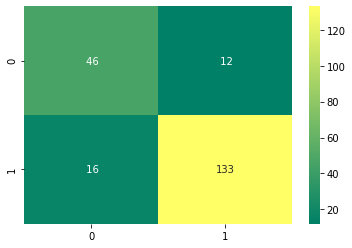

In [40]:
y_pred = cross_val_predict(modelLR, features, target,cv=10)
result_LR = cross_val_score(modelLR, features, target, cv=10, scoring="accuracy" )
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.8504166666666666


<AxesSubplot:>

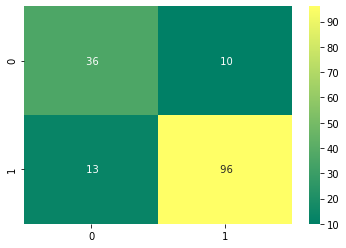

In [41]:
trainresult_LR = cross_val_score(modelLR, X_train, y_train, cv=10, scoring="accuracy")
print("The Accuracy = ", trainresult_LR.mean())
y_pred = cross_val_predict(modelLR, X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7733333333333333


<AxesSubplot:>

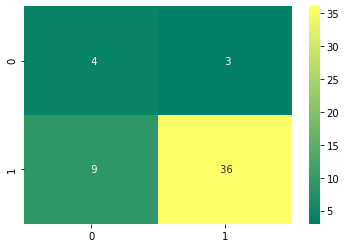

In [42]:
testresult_LR = cross_val_score(modelLR, X_test, y_test, cv=10, scoring="accuracy")
print("The Accuracy = ", testresult_LR.mean())
y_pred = cross_val_predict(modelLR, X_test, y_test, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_test),cmap="summer",annot=True,fmt="3.0f")

# DECISION TREE

A decision tree is a flowchart-like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [43]:
#Image("dt.png")

In [44]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(criterion="gini", min_samples_split=10, min_samples_leaf=1,max_features="auto")
modelDT.fit(X_train, y_train)

pred_Tree = modelDT.predict(X_test)
accDT= accuracy_score(pred_Tree, y_test)

In [45]:
accDT

0.8076923076923077

In [46]:
# Confusion Matrix

confusion_matrix(y_test, pred_Tree)

array([[ 8,  5],
       [ 5, 34]], dtype=int64)

<AxesSubplot:>

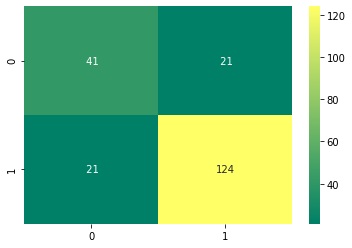

In [47]:
y_pred = cross_val_predict(modelDT, features, target,cv=10)
result_DT = cross_val_score(modelDT, features, target, cv=10, scoring="accuracy" )
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.76


<AxesSubplot:>

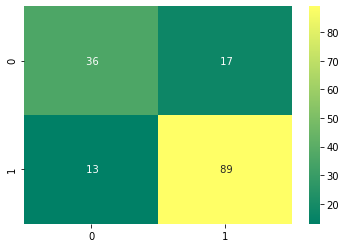

In [48]:
trainresult_DT = cross_val_score(modelDT, X_train, y_train, cv=10, scoring="accuracy")
print("The Accuracy = ", trainresult_DT.mean())
y_pred = cross_val_predict(modelDT, X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.6633333333333333


<AxesSubplot:>

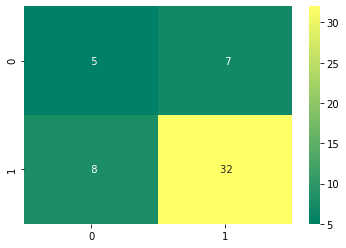

In [49]:
testresult_DT = cross_val_score(modelDT, X_test, y_test, cv=10, scoring="accuracy")
print("The Accuracy = ", testresult_DT.mean())
y_pred = cross_val_predict(modelDT, X_test, y_test, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_test),cmap="summer",annot=True,fmt="3.0f")

# RANDOM FOREST



Random Forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result. This is also considered to be the algorithm that gives the best outcome majority of the times.

In [50]:
#Image("rf.jpg")

In [51]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(criterion='gini')
modelRF.fit(X_train,y_train)
predRF = modelRF.predict(X_test)

accRF = accuracy_score(y_test, predRF)

In [52]:
accRF

0.9230769230769231

In [53]:
# Confusion Matrix

confusion_matrix(y_test, predRF)

array([[11,  2],
       [ 2, 37]], dtype=int64)

<AxesSubplot:>

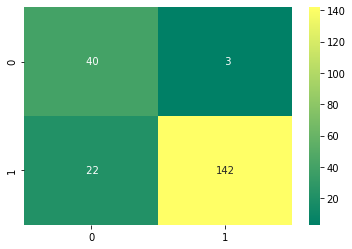

In [54]:
y_pred = cross_val_predict(modelRF, features, target, cv=10)
result_RF = cross_val_score(modelRF, features, target, cv=10, scoring="accuracy" )
sns.heatmap(confusion_matrix(y_pred,target), cmap="summer", annot=True, fmt="3.0f")

The Accuracy =  0.8383333333333335


<AxesSubplot:>

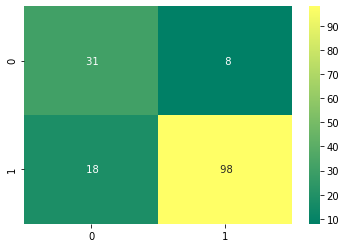

In [55]:
trainresult_RF = cross_val_score(modelRF, X_train, y_train, cv=10, scoring="accuracy")
print("The Accuracy = ", trainresult_RF.mean())
y_pred = cross_val_predict(modelRF, X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_train), cmap="summer", annot=True, fmt="3.0f")

The Accuracy =  0.8666666666666666


<AxesSubplot:>

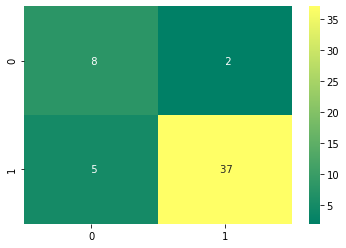

In [56]:
testresult_RF = cross_val_score(modelRF, X_test, y_test, cv=10, scoring="accuracy")
print("The Accuracy = ", testresult_RF.mean())
y_pred = cross_val_predict(modelRF, X_test, y_test, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_test), cmap="summer" , annot=True, fmt="3.0f")

# SUPPORT VECTOR MACHINE (SVM)

This algorithm mainly works on tha basis of creating divisions or partitions between clusters of values plotted on a graph. An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane.

In [57]:
#Image("svm.png")

In [58]:
from sklearn.svm import SVC

SV = SVC()
modelSV = SV.fit(X_train,y_train)
pred_svm = modelSV.predict(X_test)

accSVM =accuracy_score(pred_svm, y_test)

In [59]:
accSVM

0.8653846153846154

In [60]:
# Confusion Matrix

confusion_matrix(y_test, pred_svm)

array([[ 8,  5],
       [ 2, 37]], dtype=int64)

<AxesSubplot:>

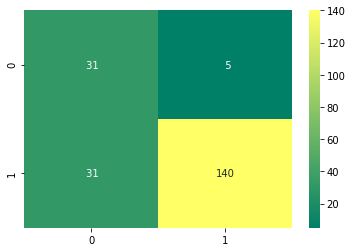

In [61]:
y_pred = cross_val_predict(modelSV, features, target, cv=10)
result_SV = cross_val_score(modelSV, features, target, cv=10, scoring="accuracy" )
sns.heatmap(confusion_matrix(y_pred,target), cmap="summer", annot=True, fmt="3.0f")


The Accuracy =  0.7925


<AxesSubplot:>

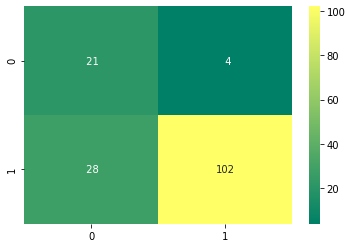

In [62]:
trainresult_SV = cross_val_score(modelSV, X_train, y_train, cv=10, scoring="accuracy")
print("The Accuracy = ", trainresult_SV.mean())
y_pred = cross_val_predict(modelSV, X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_train), cmap="summer", annot=True, fmt="3.0f")

The Accuracy =  0.7533333333333333


<AxesSubplot:>

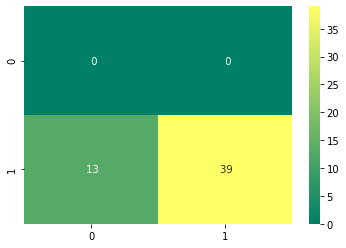

In [63]:
testresult_SV = cross_val_score(modelSV, X_test, y_test, cv=10, scoring="accuracy")
print("The Accuracy = ", testresult_SV.mean())
y_pred = cross_val_predict(modelSV, X_test, y_test, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_test), cmap="summer", annot=True, fmt="3.0f")


# KNN

K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. It is also called as 'Lazy learning method' because it does not have a specialized training phase and uses all the data for training while classification.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier(n_neighbors =4)
modelKN = KN.fit(X_train,y_train)
pred_KNN = modelKN.predict(X_test)
accKNN= accuracy_score(pred_KNN, y_test)

In [65]:
accKNN

0.8076923076923077

In [66]:
# Confusion Matrix

confusion_matrix(y_test, pred_KNN)

array([[ 9,  4],
       [ 6, 33]], dtype=int64)

<AxesSubplot:>

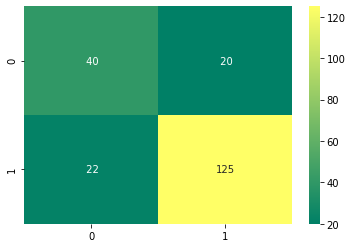

In [67]:
y_pred = cross_val_predict(modelKN, features, target, cv=10)
result_KN = cross_val_score(modelKN, features, target, cv=10, scoring="accuracy" )
sns.heatmap(confusion_matrix(y_pred,target), cmap="summer", annot=True, fmt="3.0f")

The Accuracy =  0.7933333333333333


<AxesSubplot:>

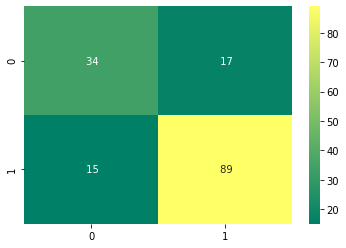

In [68]:
trainresult_KN = cross_val_score(modelKN, X_train, y_train, cv=10, scoring="accuracy")
print("The Accuracy = ", trainresult_KN.mean())
y_pred = cross_val_predict(modelKN, X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_train), cmap="summer", annot=True, fmt="3.0f")

The Accuracy =  0.8866666666666667


<AxesSubplot:>

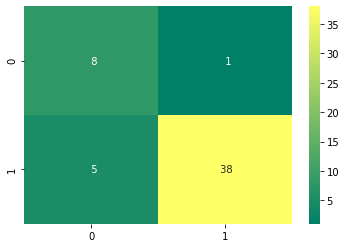

In [69]:
testresult_KN = cross_val_score(modelKN, X_test, y_test, cv=10, scoring="accuracy")
print("The Accuracy = ", testresult_KN.mean())
y_pred = cross_val_predict(modelKN, X_test, y_test, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_test), cmap="summer", annot=True, fmt="3.0f")


# Naive Bayes

This algorithm is based on the Bayes Theorem which is :

In [70]:
#Image("nb.png")

In [71]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
modelNB = NB.fit(X_train,y_train)
pred_NB = modelNB.predict(X_test)
accNB = accuracy_score(pred_NB, y_test)

In [72]:
accNB

0.8076923076923077

In [73]:
# Confusion Matrix

confusion_matrix(y_test, pred_NB)

array([[10,  3],
       [ 7, 32]], dtype=int64)

<AxesSubplot:>

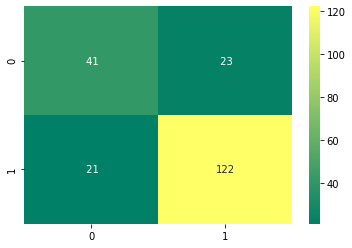

In [74]:
y_pred = cross_val_predict(modelNB, features, target, cv=10)
result_NB = cross_val_score(modelNB, features, target, cv=10, scoring="accuracy" )
sns.heatmap(confusion_matrix(y_pred,target), cmap="summer", annot=True, fmt="3.0f")


The Accuracy =  0.7879166666666666


<AxesSubplot:>

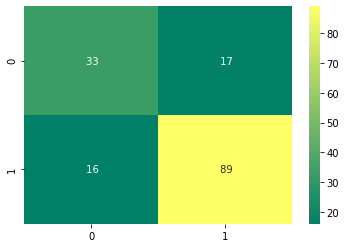

In [75]:
trainresult_NB = cross_val_score(modelNB, X_train, y_train, cv=10, scoring="accuracy")
print("The Accuracy = ", trainresult_NB.mean())
y_pred = cross_val_predict(modelNB, X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_train), cmap="summer", annot=True, fmt="3.0f")


The Accuracy =  0.8466666666666667


<AxesSubplot:>

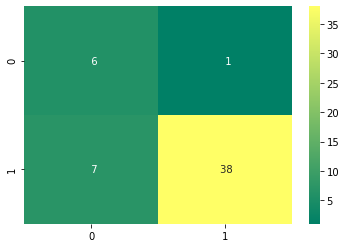

In [76]:
testresult_NB = cross_val_score(modelNB ,X_test, y_test, cv=10, scoring="accuracy")
print("The Accuracy = ", testresult_NB.mean())
y_pred = cross_val_predict(modelNB, X_test, y_test, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_test), cmap="summer", annot=True, fmt="3.0f")

# AdaBoost

AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. 

In [77]:
from sklearn.ensemble import AdaBoostClassifier

AB = AdaBoostClassifier()
modelAB = AB.fit(X_train,y_train)
pred_AB = modelAB.predict(X_test)
accAB = accuracy_score(pred_AB, y_test)

In [78]:
accAB

0.7884615384615384

In [79]:
# Confusion Matrix

confusion_matrix(y_test, pred_AB)

array([[10,  3],
       [ 8, 31]], dtype=int64)

<AxesSubplot:>

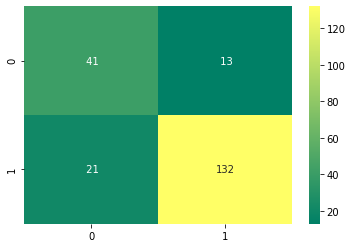

In [80]:
y_pred = cross_val_predict(modelAB, features, target, cv=10)
result_AB = cross_val_score(modelAB, features, target, cv=10, scoring="accuracy" )
sns.heatmap(confusion_matrix(y_pred,target), cmap="summer", annot=True, fmt="3.0f")

The Accuracy =  0.8570833333333333


<AxesSubplot:>

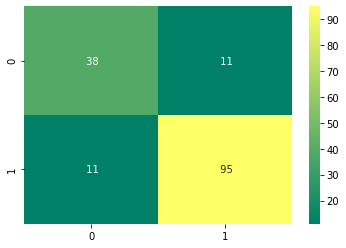

In [81]:
trainresult_AB = cross_val_score(modelAB, X_train, y_train, cv=10, scoring="accuracy")
print("The Accuracy = ", trainresult_AB.mean())
y_pred = cross_val_predict(modelAB, X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_train), cmap="summer", annot=True, fmt="3.0f")


The Accuracy =  0.7499999999999999


<AxesSubplot:>

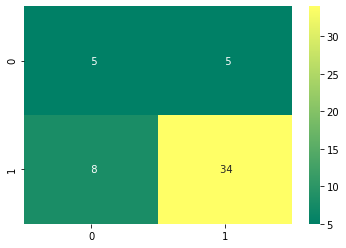

In [82]:
testresult_AB = cross_val_score(modelAB, X_test, y_test, cv=10, scoring="accuracy")
print("The Accuracy = ", testresult_AB.mean())
y_pred = cross_val_predict(modelAB, X_test, y_test, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_test), cmap="summer", annot=True, fmt="3.0f")

# Gradient Boosting

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
modelGB = GB.fit(X_train, y_train)
pred_GB = modelGB.predict(X_test)
accGB = accuracy_score(pred_GB, y_test)

In [84]:
accGB

0.8269230769230769

In [85]:
# Confusion Matrix

confusion_matrix(y_test, pred_GB)

array([[ 7,  6],
       [ 3, 36]], dtype=int64)

<AxesSubplot:>

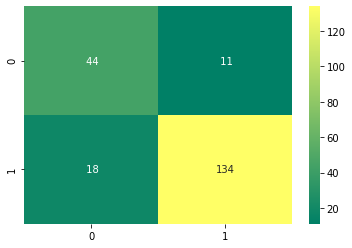

In [86]:
y_pred = cross_val_predict(modelGB, features, target, cv=10)
result_GB = cross_val_score(modelGB, features, target, cv=10, scoring="accuracy" )
sns.heatmap(confusion_matrix(y_pred,target), cmap="summer", annot=True, fmt="3.0f")



The Accuracy =  0.8691666666666669


<AxesSubplot:>

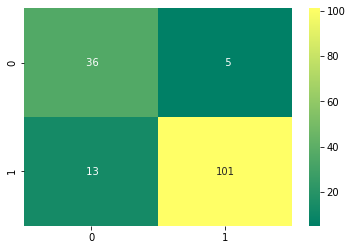

In [87]:
trainresult_GB = cross_val_score(modelGB, X_train, y_train, cv=10, scoring="accuracy")
print("The Accuracy = ", trainresult_GB.mean())
y_pred = cross_val_predict(modelGB, X_train, y_train, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_train), cmap="summer", annot=True, fmt="3.0f")


The Accuracy =  0.6799999999999999


<AxesSubplot:>

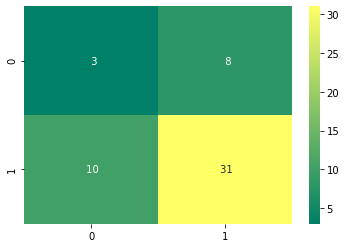

In [88]:
testresult_GB = cross_val_score(modelGB , X_test, y_test, cv=10, scoring="accuracy")
print("The Accuracy = ", testresult_GB.mean())
y_pred = cross_val_predict(modelGB, X_test, y_test, cv=10)
sns.heatmap(confusion_matrix(y_pred,y_test), cmap="summer", annot=True, fmt="3.0f")

# MODEL EVALUATION

In [89]:
models= pd.DataFrame({ 
"Model" : ["Logistic Regression","Decision Tree", "Random Forest", "Support Vector Machine", "KNN" , "Naive Bayes", "Ada Boost", "Gradient Boost"],
"Acc of Predictions" : [accLR,accDT,accRF,accSVM,accKNN,accNB,accAB,accGB],    
"FullScore" : [result_LR.mean(),result_DT.mean(),result_RF.mean(),result_SV.mean(), result_KN.mean(), result_NB.mean(), result_AB.mean(), result_GB.mean()],
"TrainScore": [trainresult_LR.mean(),trainresult_DT.mean(), trainresult_RF.mean(), trainresult_SV.mean(), trainresult_KN.mean(), trainresult_NB.mean(), trainresult_AB.mean(), trainresult_GB.mean()],
"TestScore" : [testresult_LR.mean(),testresult_DT.mean(), testresult_RF.mean(), testresult_SV.mean(), testresult_KN.mean(), testresult_NB.mean(), testresult_AB.mean(), testresult_GB.mean()]
})

In [90]:
models #to finally print the accuracy of all the models.

,Model,Acc of Predictions,FullScore,TrainScore,TestScore
0,Logistic Regression,0.826923,0.864762,0.850417,0.773333
1,Decision Tree,0.807692,0.757143,0.760000,0.663333
2,Random Forest,0.923077,0.854762,0.838333,0.866667
3,Support Vector Machine,0.865385,0.825476,0.792500,0.753333
4,KNN,0.807692,0.796429,0.793333,0.886667
5,Naive Bayes,0.807692,0.786429,0.787917,0.846667
6,Ada Boost,0.788462,0.835238,0.857083,0.750000
7,Gradient Boost,0.826923,0.854524,0.869167,0.680000


In [91]:
models.sort_values(by="Acc of Predictions")

,Model,Acc of Predictions,FullScore,TrainScore,TestScore
6,Ada Boost,0.788462,0.835238,0.857083,0.750000
1,Decision Tree,0.807692,0.757143,0.760000,0.663333
4,KNN,0.807692,0.796429,0.793333,0.886667
5,Naive Bayes,0.807692,0.786429,0.787917,0.846667
0,Logistic Regression,0.826923,0.864762,0.850417,0.773333
7,Gradient Boost,0.826923,0.854524,0.869167,0.680000
3,Support Vector Machine,0.865385,0.825476,0.792500,0.753333
2,Random Forest,0.923077,0.854762,0.838333,0.866667


In [92]:
models.sort_values(by="FullScore")

,Model,Acc of Predictions,FullScore,TrainScore,TestScore
1,Decision Tree,0.807692,0.757143,0.760000,0.663333
5,Naive Bayes,0.807692,0.786429,0.787917,0.846667
4,KNN,0.807692,0.796429,0.793333,0.886667
3,Support Vector Machine,0.865385,0.825476,0.792500,0.753333
6,Ada Boost,0.788462,0.835238,0.857083,0.750000
7,Gradient Boost,0.826923,0.854524,0.869167,0.680000
2,Random Forest,0.923077,0.854762,0.838333,0.866667
0,Logistic Regression,0.826923,0.864762,0.850417,0.773333


After having a look at all the tables Random Forest seems to be giving us the best results and so this is the algorithm we would use to get most of our predictions right.

# SUMMARY

1. Better academic percentages have proven to give the students a better chance of getting placed.
2. Previous Work experience does not necessarily help majority of the students in getting placed.
3. To get placed a student doesnt need a very good employabilty test score.
4. After comparing results from all algorithms, Random Forest seems to give us the best outcome.

In [93]:
a={'gender':[1,1,1,1,1],'ssc_p':[67.00,79.33,65.00,56.00,85.80],'ssc_b':[1,0,0,0,0],'hsc_p':[91.00,78.33,68.00,52.00,73.60],'hsc_b':[1,1,0,0,0],'hsc_s':[1,2,0,2,1],'degree_p':[58.00,77.48,64.00,52.00,73.30],'degree_t':[2,2,0,2,0],'workex':[0,1,0,0,0],'etest_p':[55.0,86.5,75.0,66.0,96.8],'specialisation':[1,0,0,1,0],'mba_p':[58.80,66.28,57.80,59.43,55.50]}
b=pd.DataFrame.from_dict(a)
b

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [94]:
forcast = modelRF.predict(b)
forcast

array([1, 1, 1, 0, 1])

In [95]:
import pickle

In [96]:
# save the model to disk
filename = 'RF_model.sav'
pickle.dump(modelRF, open(filename, 'wb'))

In [102]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(b)


In [104]:
type(result)

numpy.ndarray

In [119]:
q={'gender':'1','ssc_p':'67.00','ssc_b':'1','hsc_p':'91.00','hsc_b':'1','hsc_s':'1','degree_p':'58.00','degree_t':'2','workex':'0','etest_p':'55.0','specialisation':'1','mba_p':'58.80'}
w=pd.DataFrame(q,index=[0])
w

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80


In [120]:
loadmodel = pickle.load(open(filename, 'rb'))
r = loadmodel.predict(w)
r

array([1])

In [114]:
type(r)

numpy.ndarray

In [112]:
f=float(r)
f
#type(f)

1.0